In [100]:
import numpy as np
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:


# Define a function to be explored

def f(x):
    #x = x.reshape(len(x),)
    return (1 / (2*np.pi))*x*np.sin(x**2)-x*np.cos(np.sin(np.cos(x)))+(1-np.abs(np.sin(x)))*x

# Define a prior

# Define the kernel

def kernel(x, x_dash, l=1):
    sqdist = np.sum(x**2,1).reshape(-1,1)+np.sum(x_dash**2, 1)-2*np.dot(x, x_dash.T)
    return np.exp(-0.5 * sqdist)

def fmu(x_star, x_train, y):
    """ 
    This is the expected value of all functions f*. It
    
    """
    SIGMA = 1e-6
    K_star = kernel(x_train, x_star)
    K_y = kernel(x_train, x_train)

    #K_y = np.linalg.inv(L).T*np.linalg.inv(L)*y
    
    L = np.linalg.cholesky(K_y+SIGMA**2*np.eye(len(K_y)))
    alfa = np.matmul(np.linalg.inv(L).T,np.matmul(np.linalg.inv(L),y))
    return np.matmul(K_star.T, alfa)
    

def fcovar(x_star, x_train, y):
    SIGMA = 1e-6
    K_star = kernel(x_train, x_star)
    K_y = kernel(x_train, x_train)
    L = np.linalg.cholesky(K_y+SIGMA**2*np.eye(len(K_y)))
    
    v = np.linalg.lstsq(L, K_star)[0]
    return np.diag(kernel(x_star, x_star)-np.matmul(v.T, v)).reshape(-1,1)
    
    


# Calculate the mean and covariance in the GP



In [162]:
# Sample two points from this function

x_train = np.random.uniform(low=-10, high=10, size=(3,)).reshape(-1,1)
f_train = f(x_train)



In [168]:
%pdb off

# Calculate the kernel at these points
x_star = np.linspace(-10, 10, 100).reshape(-1, 1)


K_train = kernel(x_train, x_train)
K_star = kernel(x_train, x_star)

# Use this to calculate the mean and covariance of the GP
#x_star = np.array([0, 0.5, 6]).reshape(-1,1)

mu = fmu(x_star, x_train, f_train).reshape(-1)
var = fcovar(x_star, x_train, f_train).reshape(-1)
x_star = x_star.reshape(-1)





Automatic pdb calling has been turned OFF


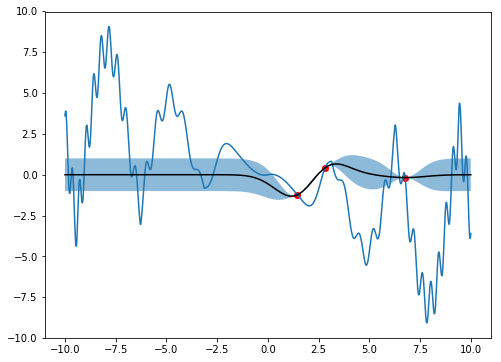

In [170]:
# Plot the complicated function
x_i = np.linspace(-10, 10,1000)
plt.figure(figsize=(8,6))
plt.plot(x_i, f(x_i))
plt.scatter(x_train, f_train,color='r')
plt.plot(x_star, mu, color='k')
plt.fill_between(x_star, mu-var, mu+var, alpha=0.5)

In [147]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2*np.pi*x)
y2 = 1.2*np.sin(4*np.pi*x)

print(np.shape(x))
print(np.shape(y1))
print(np.shape(y2))

(200,)
(200,)
(200,)
